In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
# import warnings
# warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df_house_price = pd.read_csv("house_price.csv")

In [3]:
df_house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_house_price.shape

(1460, 81)

In [5]:
numeric_var = df_house_price.dtypes[df_house_price.dtypes != "object"].index

In [10]:
#numeric_var 

In [6]:
len(numeric_var)

38

In [7]:
categorical_var =df_house_price.dtypes[df_house_price.dtypes == "object"].index

In [8]:
len(categorical_var)

43

In [11]:
data_num = df_house_price[numeric_var]

In [12]:
data_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [13]:
corr_matrix = data_num.corr()

In [14]:
filter_corr = corr_matrix[corr_matrix >.5]

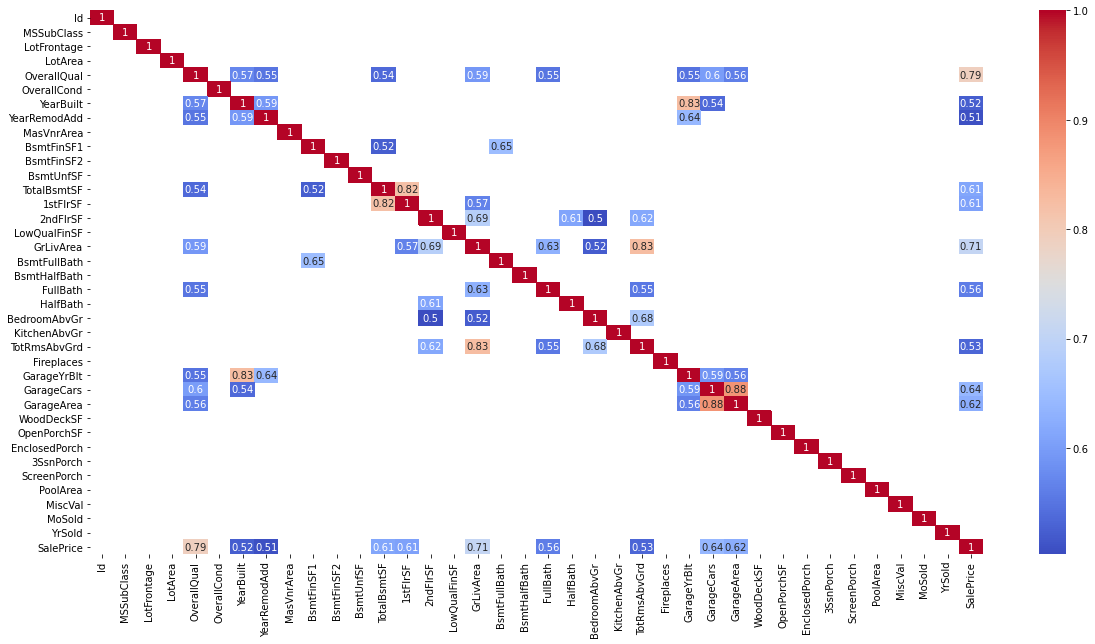

In [15]:
plt.figure(figsize =(20,10))
sns.heatmap(filter_corr, annot = True, cmap = "coolwarm") ;

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


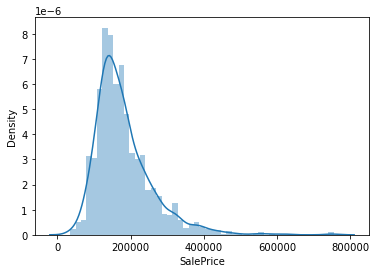

In [16]:
sns.distplot(df_house_price.SalePrice);

In [29]:
# PCA 
# step 1 :- missing value 

In [17]:
total_missing_value = df_house_price.isnull().sum().sort_values(ascending = False)

In [25]:
total_missing_value

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

In [22]:
df_house_price.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [23]:
df_house_price.isnull().count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1460
LotArea          1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 81, dtype: int64

In [18]:
percent_of_missing_value = (df_house_price.isnull().sum()/df_house_price.isnull().count()).sort_values(ascending = False)

In [24]:
percent_of_missing_value

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
                   ...   
CentralAir       0.000000
SaleCondition    0.000000
Heating          0.000000
TotalBsmtSF      0.000000
Id               0.000000
Length: 81, dtype: float64

In [26]:
missing_data = pd.concat([total_missing_value,percent_of_missing_value],axis = 1 , keys = ["Total","Percent"])

In [27]:
missing_data.head(6)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397


In [28]:
# Imputing missing values for non numeric data
df_house_price["PoolQC"] = df_house_price["PoolQC"].fillna("None")
df_house_price["MiscFeature"] = df_house_price["MiscFeature"].fillna("None")
df_house_price["Alley"] = df_house_price["Alley"].fillna("None")
df_house_price["Fence"] = df_house_price["Fence"].fillna("None")
df_house_price["FireplaceQu"] = df_house_price["FireplaceQu"].fillna("None")

In [48]:
df_house_price["PoolQC"] 

0       None
1       None
2       None
3       None
4       None
        ... 
1455    None
1456    None
1457    None
1458    None
1459    None
Name: PoolQC, Length: 1460, dtype: object

In [42]:
total_missing_value = df_house_price.isnull().sum().sort_values(ascending = False)
percent_of_missing_value = (df_house_price.isnull().sum()/df_house_price.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total_missing_value,percent_of_missing_value],axis = 1 , keys = ["Total","Percent"])
missing_data.head(10)

,Total,Percent
SalePrice,0,0.0
Heating,0,0.0
RoofStyle,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0


In [51]:
df_house_price["LotFrontage"]

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [30]:
df_house_price["Neighborhood"]

0       CollgCr
1       Veenker
2       CollgCr
3       Crawfor
4       NoRidge
         ...   
1455    Gilbert
1456     NWAmes
1457    Crawfor
1458      NAmes
1459    Edwards
Name: Neighborhood, Length: 1460, dtype: object

In [31]:
df_house_price["LotFrontage"] = df_house_price.groupby("Neighborhood")["LotFrontage"].transform(lambda x : x.fillna(x.median()))

In [55]:
df_house_price["LotFrontage"]

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [33]:
for i in ("GarageCond", "GarageType", "GarageFinish", "GarageQual"):
    df_house_price[i] = df_house_price[i].fillna("None")

In [35]:
df_house_price["GarageYrBlt"] = df_house_price["GarageYrBlt"].fillna(0)

In [37]:
missing_data.head(10)

,Total,Percent
BsmtFinType2,38,0.026027
BsmtExposure,38,0.026027
BsmtQual,37,0.025342
BsmtFinType1,37,0.025342
BsmtCond,37,0.025342
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685
ExterQual,0,0.000000
RoofMatl,0,0.000000


In [38]:
for i in ("BsmtFinType2","BsmtExposure","BsmtQual","BsmtFinType1","BsmtCond","MasVnrType","Electrical"):
    df_house_price[i]= df_house_price[i].fillna("None")

In [65]:
# MasVnrArea

In [40]:
df_house_price["MasVnrArea"].mode()[0]

0.0

In [41]:
df_house_price["MasVnrArea"] = df_house_price["MasVnrArea"].fillna(df_house_price["MasVnrArea"].mode()[0])

In [73]:
# Categorical dataframe 

In [43]:
categorical_var = df_house_price.dtypes[df_house_price.dtypes == "object"]

In [76]:
#categorical_var

In [78]:
df_house_price["OverallCond"].dtype

dtype('int64')

In [44]:
num_var = df_house_price.dtypes[df_house_price.dtypes != "object"]

In [45]:
num_var

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [46]:
df_house_price["OverallCond"] = df_house_price["OverallCond"].astype(str)

In [83]:
df_house_price["OverallCond"].dtype

dtype('O')

In [47]:
df_house_price["OverallQual"] = df_house_price["OverallQual"].astype(str)
df_house_price["MoSold"] = df_house_price["MoSold"].astype(str)
df_house_price["YrSold"] = df_house_price["YrSold"].astype(str)

In [48]:
categorical_var2 = df_house_price.dtypes[df_house_price.dtypes == "object"].index

In [49]:
num_var2 = df_house_price.dtypes[df_house_price.dtypes != "object"].index

In [50]:
categorical_var2

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [ ]:
# Categorical variable 

In [51]:
df_house_price["Neighborhood"].head()

0    CollgCr
1    Veenker
2    CollgCr
3    Crawfor
4    NoRidge
Name: Neighborhood, dtype: object

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
for c in categorical_var2 :
    label_ec = LabelEncoder()
    label_ec.fit(list(df_house_price[c].values))
    df_house_price[c] = label_ec.transform(list(df_house_price[c].values))

In [54]:
df_house_price["Neighborhood"].head()

0     5
1    24
2     5
3     6
4    15
Name: Neighborhood, dtype: int32

In [55]:
df_house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,1,3,3,0,...,0,3,4,1,0,4,2,8,4,208500
1,2,20,3,80.0,9600,1,1,3,3,0,...,0,3,4,1,0,7,1,8,4,181500
2,3,60,3,68.0,11250,1,1,0,3,0,...,0,3,4,1,0,11,2,8,4,223500
3,4,70,3,60.0,9550,1,1,0,3,0,...,0,3,4,1,0,4,0,8,0,140000
4,5,60,3,84.0,14260,1,1,0,3,0,...,0,3,4,1,0,3,2,8,4,250000


In [56]:
df_house_price.shape

(1460, 81)

In [97]:
# split data into independent and dependent vriables 

In [57]:
X = df_house_price.drop("SalePrice", axis = 1)

In [58]:
X.shape

(1460, 80)

In [59]:
X = X.drop("Id",axis = 1)

In [60]:
X.shape

(1460, 79)

In [61]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,1,3,3,0,4,...,0,0,3,4,1,0,4,2,8,4
1,20,3,80.0,9600,1,1,3,3,0,2,...,0,0,3,4,1,0,7,1,8,4
2,60,3,68.0,11250,1,1,0,3,0,4,...,0,0,3,4,1,0,11,2,8,4
3,70,3,60.0,9550,1,1,0,3,0,0,...,0,0,3,4,1,0,4,0,8,0
4,60,3,84.0,14260,1,1,0,3,0,2,...,0,0,3,4,1,0,3,2,8,4


In [103]:
# Standardize independent variables (X)

In [62]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [63]:
sc_x = StandardScaler()
X_std = sc_x.fit_transform(X)
#X_std

In [66]:
#X_std

In [ ]:
# PCA activity

In [67]:
from sklearn.decomposition import PCA as sklearnPCA

In [68]:
sklearn_pca = sklearnPCA(n_components = 79)

In [69]:
Y_sklearn  =sklearn_pca.fit_transform(X_std)

In [116]:
print(sklearn_pca.explained_variance_ratio_)

[1.26271079e-01 5.20480173e-02 4.73486016e-02 3.89414925e-02
 3.34683080e-02 2.79834940e-02 2.45538160e-02 2.29504435e-02
 2.14623915e-02 2.06966844e-02 1.99064459e-02 1.95031347e-02
 1.84183675e-02 1.74644214e-02 1.69654112e-02 1.63259694e-02
 1.57712076e-02 1.52908269e-02 1.47463534e-02 1.45339850e-02
 1.43444725e-02 1.37792114e-02 1.35453261e-02 1.31577518e-02
 1.29723366e-02 1.28623330e-02 1.25029451e-02 1.21161110e-02
 1.18337801e-02 1.17273753e-02 1.14741676e-02 1.10188794e-02
 1.08389120e-02 1.06227401e-02 1.03007569e-02 1.00812254e-02
 9.91976123e-03 9.63695269e-03 9.54741073e-03 9.43123987e-03
 8.88106989e-03 8.47331766e-03 8.26700640e-03 8.24590762e-03
 7.83034858e-03 7.73625506e-03 7.63371845e-03 7.48225872e-03
 7.06308602e-03 6.85924805e-03 6.78776590e-03 6.73558586e-03
 6.40872537e-03 6.08836107e-03 5.70502567e-03 5.50034326e-03
 5.46698823e-03 5.17605225e-03 4.99811939e-03 4.84682196e-03
 4.69854946e-03 4.62205162e-03 4.09059060e-03 3.96273488e-03
 3.90567231e-03 3.718986

In [70]:
print(sklearn_pca.singular_values_)

[1.20681839e+02 7.74804383e+01 7.38998491e+01 6.70187418e+01
 6.21307866e+01 5.68121131e+01 5.32168877e+01 5.14500161e+01
 4.97541178e+01 4.88585262e+01 4.79166930e+01 4.74288051e+01
 4.60909374e+01 4.48814702e+01 4.42356251e+01 4.33939778e+01
 4.26503351e+01 4.19957614e+01 4.12412948e+01 4.09432514e+01
 4.06754405e+01 3.98659534e+01 3.95261674e+01 3.89565796e+01
 3.86811233e+01 3.85167689e+01 3.79748561e+01 3.73827800e+01
 3.69446640e+01 3.67781928e+01 3.63789841e+01 3.56499306e+01
 3.53576033e+01 3.50032405e+01 3.44686713e+01 3.40993921e+01
 3.38252163e+01 3.33395579e+01 3.31843089e+01 3.29818012e+01
 3.20053527e+01 3.12619970e+01 3.08790628e+01 3.08396333e+01
 3.00524942e+01 2.98713853e+01 2.96727667e+01 2.93769250e+01
 2.85421853e+01 2.81273118e+01 2.79803667e+01 2.78726115e+01
 2.71879088e+01 2.64996522e+01 2.56518549e+01 2.51874888e+01
 2.51110020e+01 2.44337035e+01 2.40100623e+01 2.36438670e+01
 2.32794050e+01 2.30891194e+01 2.17211583e+01 2.13790047e+01
 2.12245199e+01 2.071105

In [71]:
np.cumsum(sklearn_pca.explained_variance_ratio_)

array([0.12627108, 0.1783191 , 0.2256677 , 0.26460919, 0.2980775 ,
       0.32606099, 0.35061481, 0.37356525, 0.39502764, 0.41572433,
       0.43563077, 0.45513391, 0.47355228, 0.4910167 , 0.50798211,
       0.52430808, 0.54007929, 0.55537011, 0.57011647, 0.58465045,
       0.59899492, 0.61277413, 0.62631946, 0.63947721, 0.65244955,
       0.66531188, 0.67781483, 0.68993094, 0.70176472, 0.71349209,
       0.72496626, 0.73598514, 0.74682405, 0.75744679, 0.76774755,
       0.77782878, 0.78774854, 0.79738549, 0.8069329 , 0.81636414,
       0.82524521, 0.83371853, 0.84198553, 0.85023144, 0.85806179,
       0.86579804, 0.87343176, 0.88091402, 0.88797711, 0.89483636,
       0.90162412, 0.90835971, 0.91476843, 0.92085679, 0.92656182,
       0.93206216, 0.93752915, 0.9427052 , 0.94770332, 0.95255015,
       0.95724869, 0.96187075, 0.96596134, 0.96992407, 0.97382974,
       0.97754873, 0.98086687, 0.98402438, 0.98692897, 0.98961018,
       0.99177196, 0.99348516, 0.9950622 , 0.99643923, 0.99774

In [72]:
sklearn_pca2 = sklearnPCA(n_components = 50)

In [74]:
Y_sklearn2 = sklearn_pca2.fit_transform(X_std)

In [75]:
np.cumsum(sklearn_pca2.explained_variance_ratio_)

array([0.12627108, 0.1783191 , 0.2256677 , 0.26460919, 0.2980775 ,
       0.32606099, 0.3506148 , 0.37356523, 0.39502762, 0.4157243 ,
       0.43563074, 0.45513385, 0.47355219, 0.49101651, 0.50798172,
       0.52430765, 0.54007875, 0.55536937, 0.57011533, 0.58464907,
       0.5989933 , 0.61277232, 0.62631724, 0.63947429, 0.65244594,
       0.66530723, 0.67780981, 0.68992531, 0.7017578 , 0.71348432,
       0.72495639, 0.73597337, 0.74681117, 0.75743111, 0.76772727,
       0.77780406, 0.78771825, 0.79734895, 0.80689339, 0.81631889,
       0.82518566, 0.83362723, 0.84188357, 0.85010937, 0.85792071,
       0.8656466 , 0.87325916, 0.88073338, 0.88777652, 0.8945656 ])

In [76]:
Y_sklearn2

array([[ 2.11308268,  0.43242214, -1.69359784, ...,  0.89227744,
        -0.03944802,  0.73937671],
       [ 0.43951517, -2.06117373,  1.08646858, ..., -0.30485713,
        -0.75559239, -0.73197438],
       [ 2.51188434,  0.23921077, -1.39041385, ...,  0.43814112,
         0.37821393,  0.29529924],
       ...,
       [ 1.24526628,  2.37193279,  0.96576062, ..., -0.63074624,
        -0.47216964,  0.29552827],
       [-2.46793611, -3.06224782,  1.51887489, ...,  0.90063322,
         0.43020827,  0.28704041],
       [-0.56816427, -2.66042195,  1.49942008, ...,  0.93346302,
         0.54185345, -0.10825929]])

In [77]:
df22 = pd.DataFrame(Y_sklearn2)

In [78]:
df22.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,2.113083,0.432422,-1.693598,1.476532,0.080581,-1.242931,0.029055,-0.184011,-0.099814,-0.934522,...,-0.032402,0.080944,0.416794,0.025075,0.286047,0.666803,0.439033,0.892277,-0.039448,0.739377
1,0.439515,-2.061174,1.086469,0.499783,-0.702847,-0.293211,-0.012175,-1.298011,-0.359340,0.015454,...,-1.056068,0.351693,0.479466,-0.166661,-0.079326,-1.266161,1.140028,-0.304857,-0.755592,-0.731974
2,2.511884,0.239211,-1.390414,1.635238,-0.257430,-1.721012,-0.590897,-0.187074,0.355808,-0.446011,...,-0.274047,-0.102439,0.261488,0.319887,-0.094494,1.012602,-0.566467,0.438141,0.378214,0.295299
3,-1.476922,1.000863,1.295491,0.490606,-0.804446,-0.843837,0.317283,1.240949,0.028567,-2.246311,...,1.463654,0.744181,-0.249230,0.073435,-1.396754,1.335364,-1.232647,-0.056976,0.827257,-0.390765
4,4.877513,1.103957,0.257360,1.836489,-0.051753,-1.105924,-0.888548,-0.291333,0.191379,-0.689390,...,-0.006031,-0.143967,-0.083433,0.099475,0.256052,0.639886,0.376526,0.385293,0.218161,-0.084058
